In [88]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('extracted_log.csv')

In [11]:
data.head(5)

,id,wall_time,step,measure/reconstruction/error,measure/activation/min_1,measure/activation/max_1,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,...,measure/evaluate/train,measure/evaluate/validation,batch_size,'class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum
0,0,1.542224e+09,1,0.123803,0.0,14.0,5.972839,5.190205,0.002854,0.460400,...,0.004664,0.004386,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1
1,1,1.542224e+09,21,0.121045,1.0,15.0,5.959671,5.214011,-0.018780,1.553893,...,0.004115,0.006031,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1
2,2,1.542224e+09,41,0.118386,1.0,14.0,5.978601,4.750162,-0.025145,1.759731,...,0.013855,0.018092,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1
3,3,1.542224e+09,61,0.117291,1.0,15.0,6.077366,4.780845,-0.028178,1.961285,...,0.011111,0.009320,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1
4,4,1.542224e+09,81,0.116464,1.0,15.0,5.915226,4.913800,-0.034704,1.956073,...,0.011111,0.009868,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1


In [16]:
data.columns

Index(['id', 'wall_time', 'step', 'measure/reconstruction/error',
       'measure/activation/min_1', 'measure/activation/max_1',
       'measure/activation/mean', 'measure/activation/std',
       'measure/parameters/W/mean', 'measure/parameters/b_h/mean',
       'measure/parameters/b_v/mean',
       'measure/hyperparameters/regularization_1',
       'measure/reconstruction_1/hamming', 'details/measure/evaluate-0/train',
       'details/measure/evaluate-0/validation',
       'details/measure/evaluate-1/train',
       'details/measure/evaluate-1/validation',
       'details/measure/evaluate-2/train',
       'details/measure/evaluate-2/validation',
       'details/measure/evaluate-3/train',
       'details/measure/evaluate-3/validation',
       'details/measure/evaluate-4/train',
       'details/measure/evaluate-4/validation',
       'details/measure/evaluate-5/train',
       'details/measure/evaluate-5/validation', 'measure/evaluate/RMSE_train',
       'measure/evaluate/RMSE_validation',

In [62]:
information = ['id', 'batch_size', "'class", 'visible_size', 'hidden_size', 'regularization', 'learning_rate', 'sampling_method', 'momentum']

#data[information].head(5).apply(lambda x: x.astype(str).str.cat(sep='/'), axis=1)
details = data[information].apply(lambda x: '/'.join([f'{i}={j}' for i,j in zip(x.index, x.values)]), axis=1)
data['details'] = details
data.head(3)

,id,wall_time,step,measure/reconstruction/error,measure/activation/min_1,measure/activation/max_1,measure/activation/mean,measure/activation/std,measure/parameters/W/mean,measure/parameters/b_h/mean,...,measure/evaluate/validation,batch_size,'class,visible_size,hidden_size,regularization,learning_rate,sampling_method,momentum,details
0,0,1.542224e+09,1,0.123803,0.0,14.0,5.972839,5.190205,0.002854,0.460400,...,0.004386,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1,id=0/batch_size=10/'class=RBMCF/visible_size=7...
1,1,1.542224e+09,21,0.121045,1.0,15.0,5.959671,5.214011,-0.018780,1.553893,...,0.006031,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1,id=1/batch_size=10/'class=RBMCF/visible_size=7...
2,2,1.542224e+09,41,0.118386,1.0,14.0,5.978601,4.750162,-0.025145,1.759731,...,0.018092,10,RBMCF,702,10,NoRegularization-0.0,ConstantLearningRate-0.01,CD-1,1,id=2/batch_size=10/'class=RBMCF/visible_size=7...


In [98]:
columns = [f'details/measure/evaluate-{i}/validation' for i in range(6)]
full_columns = columns + ['measure/evaluate/train', 'measure/evaluate/validation']

data[data["'class"] == 'RBMCF'][full_columns].idxmax()

details/measure/evaluate-0/validation     510
details/measure/evaluate-1/validation    2369
details/measure/evaluate-2/validation    1318
details/measure/evaluate-3/validation    2388
details/measure/evaluate-4/validation     857
details/measure/evaluate-5/validation    1867
measure/evaluate/train                   1779
measure/evaluate/validation               861
dtype: int64

Text(0.5, 1.0, 'RBM-CF - Best validation performance')

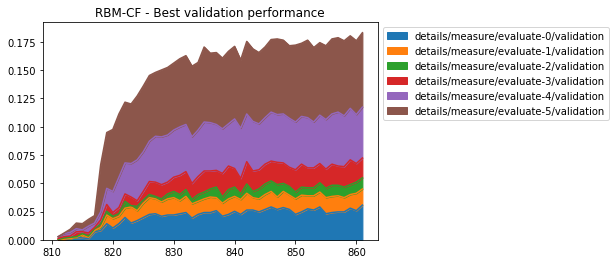

In [139]:
detail_filter = data.iloc[861].details[7:]

#ax = data[data['details'].str.contains(detail_filter)][full_columns].plot()
ax = (data[data['details'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM-CF - Best validation performance')

In [144]:
data[data["'class"] == 'RBM'][full_columns].idxmax()

details/measure/evaluate-0/validation    2853
details/measure/evaluate-1/validation    3236
details/measure/evaluate-2/validation    4256
details/measure/evaluate-3/validation    3107
details/measure/evaluate-4/validation    2722
details/measure/evaluate-5/validation    2852
measure/evaluate/train                   4837
measure/evaluate/validation              4127
dtype: int64

Text(0.5, 1.0, 'RBM - Best validation performance')

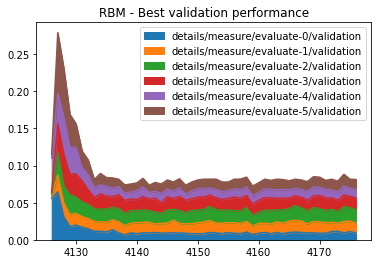

In [138]:
detail_filter = data.iloc[4127].details[7:]

#ax = data[data['details'].str.contains(detail_filter)][columns].plot()
ax = (data[data['details'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Best validation performance')

In [142]:
data[(data["'class"] == 'RBM') & (data['details'].str.contains('id=50'))][full_columns].idxmax()

details/measure/evaluate-0/validation    3411
details/measure/evaluate-1/validation    3258
details/measure/evaluate-2/validation    4278
details/measure/evaluate-3/validation    9124
details/measure/evaluate-4/validation    2748
details/measure/evaluate-5/validation    2901
measure/evaluate/train                   4839
measure/evaluate/validation              2850
dtype: int64

Text(0.5, 1.0, 'RBM - Validation performance to the best 5º effect in the last eppoch')

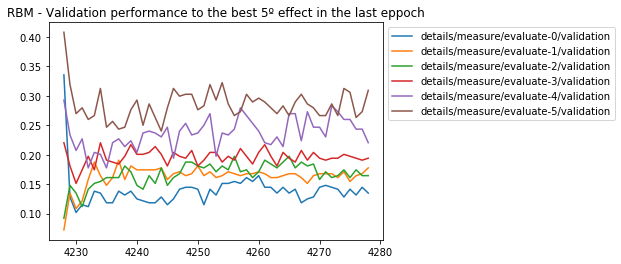

In [140]:
detail_filter = data.iloc[4278].details[7:]

ax = data[data['details'].str.contains(detail_filter)][columns].plot()
#ax = (data[data['details'].str.contains(detail_filter)][columns]/6).plot.area()
ax.legend(bbox_to_anchor=(1, 1))
ax.set_title('RBM - Validation performance to the best 5º effect in the last eppoch')